In [1]:
import numpy as np, local, binning as bn, plottools as pl, tools_cmb
from matplotlib.pyplot import *

In [21]:
#qids = local.qid_all
qids = ['s16_d03']
#qids = local.boss_dn

In [22]:
aobj = {q: local.init_analysis_params(qid=q,ascale=1.,wind='com16',ivar='noivar') for q in qids}
#aobj = {q: local.init_analysis_params(qid=q,ascale=3.,wtype='com15v3') for q in qids}
#aobj = {q: local.init_analysis_params(qid=q,ascale=3.,wtype='base') for q in qids}
ocl  = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1] for q in qids}
mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1] for q in qids}
ncl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1] for q in qids}
scl  = {q: (np.loadtxt(aobj[q].fscl['s'])).T[1] for q in qids}
vcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[7] for q in qids}
vnl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[7] for q in qids}
vsl  = {q: (np.loadtxt(aobj[q].fscl['s'])).T[7] for q in qids}

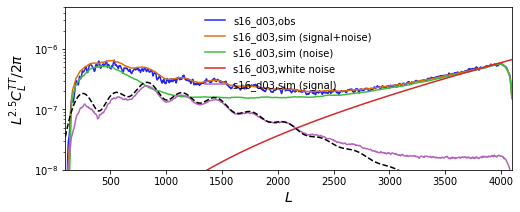

In [24]:
for q in qids:
    pl.plot_1dstyle(fsize=[8,3],xmin=100,xmax=4096,ymin=1e-8,ymax=5e-6,xlab=r'$L$',ylab=r'$L^{2.5} C^{TT}_L/2\pi$',ylog=True)
    l = aobj[q].l
    bl = tools_cmb.beam_func(aobj[q].lmax,aobj[q].qid)
    s = l**3/2./np.pi
    wnl = (40.*np.pi/10800./2.726e6)**2/bl**2#*(1.+5.*(1000./l)**3.5)
    plot(l,s*ocl[q],label=q+',obs')
    plot(l,s*mcl[q],label=q+',sim (signal+noise)')
    plot(l,s*ncl[q],label=q+',sim (noise)')
    plot(l,s*wnl,label=q+',white noise')
    plot(l,s*(mcl[q]-ncl[q]),label=q+',sim (signal)')
    plot(l,s*aobj[q].lcl[0,:],color='k',ls='--')
    legend()
    show()